**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

# Singular Value Decomposition (SVD)

In this exercise, you'll explore how Singular Value Decomposition (SVD) can help us understand patterns in text documents, specifically movie reviews.
SVD is a powerful technique that breaks down complex data into meaningful components, revealing hidden patterns and relationships.
You will experiment with SVD to decompose a document-term matrix into three components and see how this decomposition can be used for dimensionality reduction while preserving important patterns in the data.

**Background**    
Please refer to the lecture notes for an introduction to SVD and its use in NLP.  
For this assignment, our starting point is a document-term matrix where:
- Each row represents a movie review
- Each column represents a word from our vocabulary
- Each cell contains the count of how many times a word appears in a review   
For example, if we have the review "amazing action exciting" and our vocabulary includes these words, we represent this as a row vector [1, 1, 0, 0, 1] corresponding to the words ['action', 'exciting', 'boring', 'slow', 'amazing'].

**SVD Decomposition**   
SVD breaks down a matrix A into three components: A = USV^T, where   
1. U matrix (identifies review patterns):
  - Rows correspond to reviews
  - Columns represent abstract patterns
  - Values show how strongly each review exhibits each pattern
2. S (sigma) diagonal matrix:
  - Contains singular values in descending order
  - Larger values indicate more important patterns
  - Used to determine which patterns to keep in dimensionality reduction
3. V^T matrix (identifies word patterns):
  - Rows represent abstract patterns
  - Columns correspond to words
  - Values show how strongly each word contributes to each pattern


Follow the instructions in the code cells to complete and test your code. You will replace all triple underscores (___) with your code.
Please refer to the lecture slides for details on each of the functions/algorithms and hints on the implementation.
Your code will perform the following:
  - Creates a document-term matrix from sample reviews
  - Applies SVD to decompose the matrix
  - Reconstructs the matrix using fewer dimensions (k=2)
  - Calculates the reconstruction error



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create document-term matrix for movie reviews
words = ['action', 'exciting', 'boring', 'slow', 'amazing']
reviews = [
    "amazing action exciting",          # Review 1: Action movie (positive)
    "boring slow",                      # Review 2: Negative review
    "action slow amazing",              # Review 3: Mixed review
]

# Create document-term matrix  rows=reviews, columns=words
doc_term_matrix = np.array([
    [1,1,0,0,1],  # Review 1: action, exciting, amazing
    [0,0,1,1,0],  # Review 2: boring, slow
    [1,0,0,1,1],  # Review 3: action, slow, amazing
])

# Apply SVD 
U, sigma, Vt = np.linalg.svd(doc_term_matrix, full_matrices=False)

print("U:\n", U)
print("Sigma:\n", sigma)
print("Vt:\n", Vt)

# Reconstruct with fewer dimensions (k=2)
k = 2   ## only preserve 2 dimensions
reconstructed = np.dot(U[:,:k], np.dot(np.diag(sigma[:k]), Vt[:k,:])) #rebuild the original matrix using only the 2 dimensions

# U[:,:k]-- select first k cols of U
# np.diag(sigma[:k]) -- create the diagonal matrix using first k singular values
# Vt[:k,:] -- select first k rows of Vt

print("Reconstructed (k=2):\n", reconstructed)
# Calculate error
error = np.linalg.norm(doc_term_matrix - reconstructed)
print("Reconstruction error:\n", error)


#For code validation.  Do NOT change code below this line
import doctest
"""
  >>> print(doc_term_matrix[0][2])
  0
  >>> print(doc_term_matrix[2][3])
  1
  >>> np.isclose(U.flatten(),  [-0.6611152,0.49727948,-0.56181831,-0.2260912,-0.84604119,-0.48280128,-0.7154086,-0.19216509,0.6717612], atol=1e-03)
  array([ True,  True,  True,  True,  True,  True,  True,  True,  True])
  >>> np.isclose(sigma, [2.27249817, 1.49235868, 0.78013949], atol=1e-03)
  array([ True,  True,  True])
  >>> np.isclose(reconstructed[1], [0.05308057,-0.2712466,0.76690292,1.09123009,0.05308057], atol=1e-03)
  array([ True,  True,  True,  True,  True])
  >>> np.isclose(error, 0.7801, atol=1e-03)
  np.True_
"""

doctest.testmod()

U:
 [[-0.6611152   0.49727948 -0.56181831]
 [-0.2260912  -0.84604119 -0.48280128]
 [-0.7154086  -0.19216509  0.6717612 ]]
Sigma:
 [2.27249817 1.49235868 0.78013949]
Vt:
 [[-0.60573153 -0.29092001 -0.09949016 -0.41430167 -0.60573153]
 [ 0.20445111  0.33321713 -0.56691545 -0.69568147  0.20445111]
 [ 0.14092723 -0.7201511  -0.61886533  0.24221299  0.14092723]]
Reconstructed (k=2):
 [[ 1.06176793  0.68436019 -0.2712466   0.10616114  1.06176793]
 [ 0.05308057 -0.2712466   0.76690292  1.09123009  0.05308057]
 [ 0.92614463  0.37740774  0.32432717  0.87306406  0.92614463]]
Reconstruction error:
 0.7801394871233599


TestResults(failed=0, attempted=6)

## Reflection Questions  
1. Describe in your own words what the 'Original Document-Term Matrix' represents in your code output. Be specific about what each row, column, and individual value represents in the context of movie reviews.
2. Analyze the U matrix output. How do the values in this matrix relate to the sentiment of each review? Provide specific examples of how different reviews might be grouped together based on these patterns.
3. Examine the singular values output. What do these values tell us about the importance of different patterns in our movie reviews? Why might some patterns be more significant than others?
4. Study the V^T matrix output. How do the values show relationships between words in our vocabulary? Identify specific word groupings or patterns that might represent concepts like "positive" or "negative" sentiment.
5. When we reduce dimensions to k=2, what information is preserved and what is lost? Support your answer by comparing specific values between the original and reconstructed matrices.  
6. Examine the reconstruction error. How does changing the value of k affect this error, and what does this tell us about the trade-off between dimensionality reduction and information preservation? Provide specific examples from your experimentation.

1. Describe in your own words what the 'Original Document-Term Matrix' represents in your code output. Be specific about what each row, column, and individual value represents in the context of movie reviews.

   My Ans: In the document-term matrix, a row represents a review, and a column represents a word. The element represents the existence of the word in the review.

   

2. Analyze the U matrix output. How do the values in this matrix relate to the sentiment of each review? Provide specific examples of how different reviews might be grouped together based on these patterns.

   My Ans: The matrix U describes how strongly each review exhibits the pattern. From the U matrix, we can see that the first columns are all negative, this means that all of the three reviews are negative on the first pattern(component); And for the second column, we know that the second and the third review are negative, while the first review is positive on the second pattern; As for the third column, we can know that the first and the second review are negative on the third pattern, while the third review is positive on the third pattern.


3. Examine the singular values output. What do these values tell us about the importance of different patterns in our movie reviews? Why might some patterns be more significant than others?

   My Ans: The singular value represents the strength of each pattern. Since the eigen values are: 2.2725, 1.4926, 0.8701, we can see that the first pattern is the strongest, whereas the third pattern is the weakest. Some possible reason that some patterns are more significant than others: 1. Some words are just be more frequently used in the review.  2. Similar types of words tend to appear together in a review. 

   

4. Study the V^T matrix output. How do the values show relationships between words in our vocabulary? Identify specific word groupings or patterns that might represent concepts like "positive" or "negative" sentiment.

   My Ans: Each element $V_{i,j}$ of the V transpose matrix shows how strongly word j loads on component i. Within the same row, words with the same sign and larger absolute values tend to co-occur. Therefore, from the V matrix, we can see that according to the second row, words "action", "exciting", and "amazing" should be grouped together.

   

5. When we reduce dimensions to k=2, what information is preserved and what is lost? Support your answer by comparing specific values between the original and reconstructed matrices.  

​	My Ans: Since we have reduced the dimension to k=2, from the reconstruction matrix we can see that the information of the third pattern  is not well-preserved.


6. Examine the reconstruction error. How does changing the value of k affect this error, and what does this tell us about the trade-off between dimensionality reduction and information preservation? Provide specific examples from your experimentation.

​	My Ans: When k=2, the reconstruction error is 0.7801, and if we try k=1, that is reduce even more dimension, the reconstruction error becomes 1.6840, then the reconstruction error increases. 
So we can see the tradeoff: with the increase of dimensional reduction, the error also increases.

# Cosine Similarity   

In this exercise, you'll explore how the cosine similarity function can be used to calculate similarity measures between text document vectors.


**Background**    
Please refer to the lecture notes for an introduction to cosine similarity and its use in NLP.   
Cosine similarity measures the cosine of the angle between two vectors. In simpler terms:

- If two documents are very similar, their vectors point in nearly the same direction (small angle) → cosine similarity close to 1
- If two documents are very different, their vectors point in different directions (large angle) → cosine similarity close to 0
- If two documents are completely opposite, their vectors point in opposite directions → cosine similarity close to -1

The formula for cosine similarity is:
cos(θ) = (A·B)/(||A|| ||B||)
where A·B is the dot product and ||A||, ||B|| are the vector magnitudes.


Follow the instructions in the code cells to complete and test your code. You will replace all triple underscores (___) with your code.
Please refer to the lecture slides for details on each of the functions/algorithms and hints on the implementation.
Your code will perform the following:
- Create a document-term matrix from three reviews
- Calculate cosine similarities between all pairs of reviews
      def cosine_similarity(v1, v2):
        v1, v2 = input vectors
        return cosine similarity
- Visualize the results using two plots:
  - A heatmap showing word presence in each review
  - A similarity matrix showing the cosine similarity between reviews


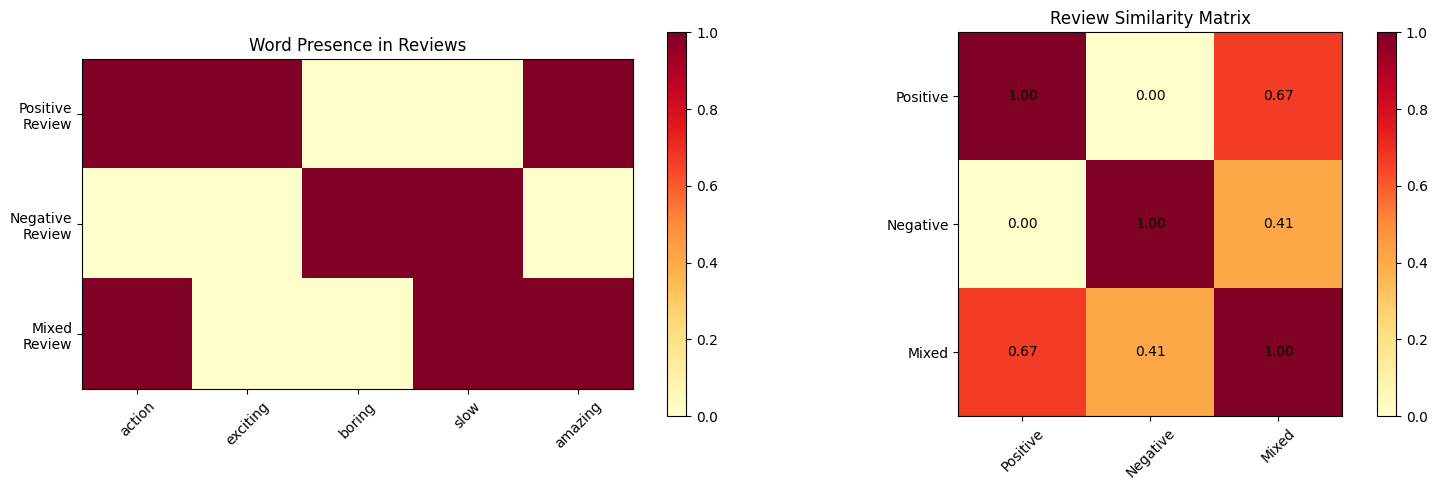


Cosine Similarity Analysis:

Review Comparisons:

Positive Review vs Negative Review:
Cosine Similarity: 0.000
Shared words: None

Positive Review vs Mixed Review:
Cosine Similarity: 0.667
Shared words: action, amazing

Negative Review vs Mixed Review:
Cosine Similarity: 0.408
Shared words: slow


TestResults(failed=0, attempted=3)

In [3]:
#Cosine Similarity Assignment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create document-term matrix for movie reviews
words = ['action', 'exciting', 'boring', 'slow', 'amazing']
reviews = [
    "amazing action exciting",          # Review 1: Action movie (positive)
    "boring slow",                      # Review 2: Negative review
    "action slow amazing",              # Review 3: Mixed review
]

# Create document-term matrix: rows=reviews, columns=words
# Note, this will be the same matrix as the SVD assignment
doc_term_matrix = np.array([
    [1,1,0,0,1],  # Review 1: action, exciting, amazing
    [0,0,1,1,0],  # Review 2: boring, slow
    [1,0,0,1,1],  # Review 3: action, slow, amazing
])

# Calculate cosine similarities
# Make sure you handle divide-by-zero cases
def cosine_similarity(v1, v2):
  #YOUR CODE HERE
  if np.linalg.norm(v1) == 0 or np.linalg.norm(v2) == 0:
    return 0.0

  dot_prod = np.dot(v1, v2)
  norm_v1 = np.linalg.norm(v1)
  norm_v2 = np.linalg.norm(v2)

  return dot_prod / (norm_v1 * norm_v2)
  

# Create visualizations
# No coding needed here - you may use these visualizations for your reflection question responses.
plt.figure(figsize=(15, 5))

# Plot 1: Word presence in reviews
plt.subplot(1, 2, 1)
plt.imshow(doc_term_matrix, cmap='YlOrRd')
plt.colorbar()
plt.xticks(range(len(words)), words, rotation=45)
plt.yticks(range(len(reviews)), ['Positive\nReview', 'Negative\nReview', 'Mixed\nReview'])
plt.title('Word Presence in Reviews')

# Plot 2: Similarity Matrix
plt.subplot(1, 2, 2)
similarities = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        similarities[i, j] = cosine_similarity(doc_term_matrix[i], doc_term_matrix[j])

plt.imshow(similarities, cmap='YlOrRd')
plt.colorbar()
plt.xticks(range(3), ['Positive', 'Negative', 'Mixed'], rotation=45)
plt.yticks(range(3), ['Positive', 'Negative', 'Mixed'])
plt.title('Review Similarity Matrix')

for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{similarities[i,j]:.2f}',
                ha='center', va='center')

plt.tight_layout()
plt.show()

# Print analysis
print("\nCosine Similarity Analysis:")
print("\nReview Comparisons:")
review_types = ['Positive Review', 'Negative Review', 'Mixed Review']

cos_sim = []
for i in range(len(doc_term_matrix)):
    for j in range(i+1, len(doc_term_matrix)):
        sim = cosine_similarity(doc_term_matrix[i], doc_term_matrix[j])
        cos_sim.append(sim)
        print(f"\n{review_types[i]} vs {review_types[j]}:")
        print(f"Cosine Similarity: {sim:.3f}")
        shared_words = [words[k] for k in range(len(words))
                       if doc_term_matrix[i,k] > 0 and doc_term_matrix[j,k] > 0]
        print("Shared words:", ", ".join(shared_words) if shared_words else "None")


#For code validation.  Do NOT change code below this line
import doctest
"""
  >>> print(doc_term_matrix[1][2])
  1
  >>> print(doc_term_matrix[2][1])
  0
  >>> np.isclose(cos_sim,  [0.0, 0.6666666666666667, 0.40824829046386296], atol=1e-03)
  array([ True,  True,  True])
"""

doctest.testmod()

## Reflection Questions   

1. Consider the following scenario:   
        review_A = [1, 1, 1, 0, 0]  # "action exciting boring"  
        review_B = [0, 0, 0, 1, 1]  # "slow amazing"  
Despite having no words in common, these reviews could theoretically have a non-zero cosine similarity. Explain why this is false and use the cosine similarity formula to prove your reasoning. What does this tell us about the relationship between shared terms and similarity scores?   
2. You are analyzing a large dataset of movie reviews and find two reviews with the following vectors:   
        review_1 = [2, 0, 3, 1, 0]  # Word counts instead of binary presence
        review_2 = [4, 0, 6, 2, 0]  # Doubled values of review_1
Without calculating, what would their cosine similarity be? Explain why this value makes sense in terms of what cosine similarity measures, and how this differs from Euclidean distance. How might this property be useful when comparing documents of different lengths?   
3. Given three movie reviews:
        review_X = [1, 1, 0, 0, 0]  # "action exciting"
        review_Y = [0, 1, 0, 0, 1]  # "exciting amazing"
        review_Z = [1, 0, 0, 0, 1]  # "action amazing"
If the cosine similarity between X and Y is equal to the cosine similarity between X and Z, what does this tell us about the relative importance of the words "exciting" and "amazing" in this vector space? What are the limitations of using binary vectors (0s and 1s) instead of weighted term frequencies in this case?

1. Consider the following scenario:   
       review_A = [1, 1, 1, 0, 0]  # "action exciting boring"  
       review_B = [0, 0, 0, 1, 1]  # "slow amazing"  
   Despite having no words in common, these reviews could theoretically have a non-zero cosine similarity. Explain why this is false and use the cosine similarity formula to prove your reasoning. What does this tell us about the relationship between shared terms and similarity scores?   

​	My Ans: Using the Cosine Similarity eqn, it is false because, since $A \cdot B$ is 0, the Cosine similarity should also be 0. So if there's no shared term, the cosine similarity should be 0.

2. You are analyzing a large dataset of movie reviews and find two reviews with the following vectors:   
       review_1 = [2, 0, 3, 1, 0]  # Word counts instead of binary presence
       review_2 = [4, 0, 6, 2, 0]  # Doubled values of review_1
   Without calculating, what would their cosine similarity be? Explain why this value makes sense in terms of what cosine similarity measures, and how this differs from Euclidean distance. How might this property be useful when comparing documents of different lengths?   

   My Ans: The Cosine similarity should be 1, since the two vectors are exactly in the same direction. It is different from the Euclidean distance since the Euclidean distance takes the length into account. It is useful since we can directly measure the similarity without having to consider the impact of the length of vector.

3. Given three movie reviews:
       review_X = [1, 1, 0, 0, 0]  # "action exciting"
       review_Y = [0, 1, 0, 0, 1]  # "exciting amazing"
       review_Z = [1, 0, 0, 0, 1]  # "action amazing"
   If the cosine similarity between X and Y is equal to the cosine similarity between X and Z, what does this tell us about the relative importance of the words "exciting" and "amazing" in this vector space? What are the limitations of using binary vectors (0s and 1s) instead of weighted term frequencies in this case?

My Ans: It means that the two words have equal importance influence on the words. If we only use 0/1, but not the frequency, we would lose the frequency similarity, but only preserve the existence. 

# Latent Semantic Analysis (LSA) Implementation

In this section, you will implement and experiment with LSA, a fundamental technique in Natural Language Processing for uncovering latent semantic relationships between documents and terms.



##Latent Semantic Analysis Class Definition
The following defines the main LSA class and all its method APIs.
Follow the instructions in the code cells to complete and test your code. You will replace all triple underscores (___) with your code.
Please refer to the lecture slides for details on each of the functions/algorithms and hints on the implementation.

    class LatentSemanticAnalyzer:
    - def __init__(self):  
      #Initializes a new LSA instance with necessary vectorization and SVD components

    - def preprocess_documents(self, documents):
      """
      Preprocess the documents:
        - Convert to lowercase
        - Remove punctuation and special characters
        - Remove stopwords
        - Tokenize
      Args:
          documents (list): List of text documents
      Returns:
          list: preprocessed documents
      """

    - def create_document_term_matrix(self, documents):
      """
      Create document-term matrix via TF-IDF.
      Args:
          documents (list): List of preprocessed documents
      Returns:
          sparse_matrix: Document-term matrix
      Notes:
          - Creates TF-IDF matrix of document-term frequencies
          - Handles sparse matrix operations
          - Returns normalized matrix
      """

    - def perform_svd(self, doc_term_matrix, n_components=2):
      """
      Perform truncated SVD for dimensionality reduction.
      Args:
          doc_term_matrix: Document-term matrix
          n_components (int): Number of components to keep
      Returns:
          ndarray: Transformed document-term matrix
      Notes:
          - Performs truncated SVD
          - Reduces dimensionality to specified components
          - Returns transformed matrix
      """

    - def find_similar_documents(self, query, doc_matrix, documents, top_k=3):
      """
      Find most similar documents to query.
      Args:
          query (str): Query text
          doc_matrix (ndarray): Transformed document matrix
          documents (list): Original documents
          top_k (int): Number of similar docs to return
      Returns:
          list: Top-k similar documents with similarity scores
      Notes:
          - Processes query same way as documents
          - Uses cosine similarity
          - Returns sorted results
      """

    - def visualize_document_clusters(self, doc_matrix, documents):
      """
      Visualize document clusters in 2D LSA space.
      Args:
          doc_matrix (ndarray): Transformed document matrix
          documents (list): Original documents
      Notes:
          - Creates scatter plot of documents
          - Uses first two LSA components
          - Adds proper labels and title
      """





In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

class LatentSemanticAnalyzer:
    def __init__(self):
        """Initialize LSA analyzer with CountVectorizer and SVD components."""
        self.vectorizer = None
        self.svd = None
        self.words = None


    def create_document_term_matrix(self, documents, stop_words=None):
        """
        Create document-term matrix using word counts.

        Args:
            documents (list): List of text documents
            stop_words (list): List of stop words to remove

        Returns:
            sparse_matrix: Document-term matrix
            DataFrame: Document-term matrix as pandas DataFrame
        """
        # Create and fit the vectorizer
        # Hint: use https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
        # Initialize the vectorizer reference.
        self.vectorizer = CountVectorizer(stop_words=stop_words)
        # Fit and transform the documents
        X = self.vectorizer.fit_transform(documents)

        # Get feature names (words)
        self.words = self.vectorizer.get_feature_names_out()

        # Create DataFrame for visualization
        doc_term_matrix = pd.DataFrame(
            X.toarray(),
            columns=self.words,
            index=[f'Doc {i+1}' for i in range(len(documents))]
        )

        return X, doc_term_matrix


    def perform_lsa(self, X, n_components=2):
        """
        Perform LSA using truncated SVD.

        Args:
            X: Document-term matrix
            n_components (int): Number of concepts to extract

        Returns:
            ndarray: Document-concept matrix
            DataFrame: Document-concept matrix as pandas DataFrame
        """
        # Perform SVD
        # Hint:  Use truncated SVD:  https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
        # Initialize the svd reference.
        self.svd = TruncatedSVD(n_components=n_components)
        # Fit and transform the input vector
        X_lsa = self.svd.fit_transform(X)

        # Create DataFrame for visualization
        doc_concept_matrix = pd.DataFrame(
            X_lsa,
            columns=[f'Concept {i+1}' for i in range(n_components)],
            index=[f'Doc {i+1}' for i in range(X.shape[0])]
        )

        return X_lsa, doc_concept_matrix


    def analyze_concepts(self):
        """
        Analyze the importance of words in each concept.

        Returns:
            list: List of word-weight pairs for each concept
        """
        concept_terms = []
        for concept_idx, concept in enumerate(self.svd.components_):
            # Get word weights for this concept
            word_weights = list(zip(self.words, concept))  ## zip: pair up the two lists (i.e. pair up words with their weights)

            # Sort word_weights by absolute weight
            word_weights.sort(key=lambda x: abs(x[1]), reverse=True)
            concept_terms.append(word_weights)

        return concept_terms


    def visualize_document_concepts(self, X_lsa, doc_labels=None):
        #No coding needed for this function
        """
        Create scatter plot of documents in concept space.

        Args:
            X_lsa: Document-concept matrix
            doc_labels: Optional list of document labels
        """
        if doc_labels is None:
            doc_labels = [f'Doc {i+1}' for i in range(X_lsa.shape[0])]

        plt.figure(figsize=(10, 6))
        plt.scatter(X_lsa[:, 0], X_lsa[:, 1])

        # Add document labels
        for i, label in enumerate(doc_labels):
            plt.annotate(label, (X_lsa[i, 0], X_lsa[i, 1]))

        plt.xlabel('First Concept')
        plt.ylabel('Second Concept')
        plt.title('Documents in Concept Space')
        plt.grid(True)
        plt.show()


    def find_similar_documents(self, doc_idx, X_lsa):
        """
        Find documents similar to the given document.

        Args:
            doc_idx (int): Index of the query document
            X_lsa: Document-concept matrix

        Returns:
            list: (document index, similarity score) pairs
        """
        # Calculate cosine similarities
        # Call your cosine_similarity function
        similarities = cosine_similarity(X_lsa[doc_idx].reshape(1, -1), X_lsa).flatten()

        # Sort by similarity
        doc_similarities = sorted(enumerate(similarities), key=lambda x: x[1], reverse=True)

        return doc_similarities[1:]  # Exclude the document itself

Document-Term Matrix (Word Counts):
       brown  bush  cat  climbs  dog  forest  fox  garden  hops  hunts  jumps  \
Doc 1      1     0    0       0    1       0    1       0     0      0      1   
Doc 2      1     0    1       0    1       0    0       0     0      0      1   
Doc 3      0     0    0       0    0       0    1       0     0      0      0   
Doc 4      1     0    1       1    0       0    0       0     0      0      0   
Doc 5      0     0    0       0    0       1    0       0     0      0      0   
Doc 6      0     1    0       0    1       0    0       0     0      0      0   
Doc 7      1     0    0       0    0       1    1       0     0      1      0   
Doc 8      0     0    0       0    0       0    0       1     1      0      0   

       lazy  quick  rabbit  runs  sleeps  tree  
Doc 1     1      1       0     0       0     0  
Doc 2     1      1       0     0       0     0  
Doc 3     1      0       0     0       1     1  
Doc 4     0      0       0     0      

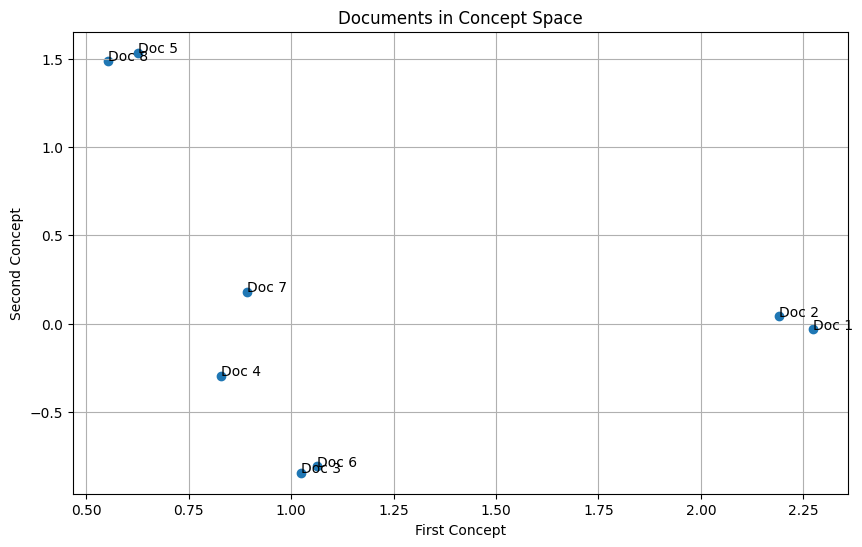


Documents similar to document 1:
Query document: 'The quick brown fox jumps over the lazy dog'
Document 2: 0.999 similarity
Text: 'A quick brown dog jumps over the lazy cat'
Document 7: 0.977 similarity
Text: 'The brown fox hunts in the forest'
Document 4: 0.947 similarity
Text: 'A brown cat climbs up the tree'
Document 6: 0.805 similarity
Text: 'A lazy dog sleeps under the bush'
Document 3: 0.780 similarity
Text: 'The lazy fox sleeps under the tree'
Document 5: 0.365 similarity
Text: 'The quick rabbit runs through the forest'
Document 8: 0.335 similarity
Text: 'A quick rabbit hops through the garden'
For doctest - Concept 1 terms: [('lazy', np.float64(0.45724298312177103)), ('brown', np.float64(0.431747538975484)), ('quick', np.float64(0.39382932000502585)), ('dog', np.float64(0.3857123074245489)), ('jumps', np.float64(0.311529086382389)), ('fox', np.float64(0.29243082177686497)), ('cat', np.float64(0.21084739289584128)), ('sleeps', np.float64(0.14571389673938212)), ('tree', np.float

TestResults(failed=0, attempted=12)

In [6]:
# Example document collection
# For code validation - do NOT change any code in this cell

documents = [
    "The quick brown fox jumps over the lazy dog",
    "A quick brown dog jumps over the lazy cat",
    "The lazy fox sleeps under the tree",
    "A brown cat climbs up the tree",
    "The quick rabbit runs through the forest",
    "A lazy dog sleeps under the bush",
    "The brown fox hunts in the forest",
    "A quick rabbit hops through the garden"
]

# Initialize LSA analyzer
lsa = LatentSemanticAnalyzer()

# Step 1: Create document-term matrix
# We'll remove common English stop words
stop_words = ['the', 'a', 'and', 'over', 'under', 'through', 'in', 'up']
X, doc_term_df = lsa.create_document_term_matrix(documents, stop_words)

print("Document-Term Matrix (Word Counts):")
print(doc_term_df)
print("\n")

# Step 2: Perform LSA
X_lsa, doc_concept_df = lsa.perform_lsa(X, n_components=2)

# Step 3: Analyze concepts
concept_terms = lsa.analyze_concepts()
for concept_idx, word_weights in enumerate(concept_terms):
    print(f"Concept {concept_idx + 1} important words:")
    for word, weight in word_weights[:5]:  # Show top 5 words per concept
        print(f"  {word}: {weight:.3f}")
    print()

print("Document-Concept Matrix:")
print(doc_concept_df)
print("\n")

# Step 4: Visualize documents in concept space
lsa.visualize_document_concepts(X_lsa)

# Step 5: Find similar documents
print("\nDocuments similar to document 1:")
print(f"Query document: '{documents[0]}'")
similar_docs = lsa.find_similar_documents(0, X_lsa)
for doc_idx, similarity in similar_docs:
    print(f"Document {doc_idx + 1}: {similarity:.3f} similarity")
    print(f"Text: '{documents[doc_idx]}'")

print('For doctest - Concept 1 terms:', concept_terms[0])
print('For doctest - Concept 2 terms:', concept_terms[1])



#For test validation - do not change any code below this line
import doctest
"""
  >>> doc_term_df.shape[0] == len(documents)
  True
  >>> doc_concept_df.shape == (len(documents), 2)
  True
  >>> len(concept_terms) == 2
  True
  >>> len(similar_docs) == len(documents) - 1
  True
  >>> print(concept_terms[0][0][0])
  lazy
  >>> np.isclose(concept_terms[0][0][1], 0.4572429831217709, atol=1e-03)
  np.True_
  >>> print(concept_terms[1][0][0])
  quick
  >>> np.isclose(concept_terms[1][0][1], 0.500544036009478, atol=1e-03)
  np.True_
  >>> print(concept_terms[0][3][0])
  dog
  >>> np.isclose(concept_terms[0][3][1], 0.3857123074245487, atol=1e-03)
  np.True_
  >>> print(concept_terms[1][4][0])
  lazy
  >>> np.isclose(concept_terms[1][4][1], -0.2704899548034848, atol=1e-03)
  np.True_


"""
doctest.testmod()

##Reflection Questions
1. In the visualization, we observed that documents can appear far apart in the concept space plot but still have high cosine similarity. Explain this phenomenon and discuss why cosine similarity was chosen as the similarity measure for LSA rather than Euclidean distance. Support your answer with specific examples from the results.
2. Compare the importance of words in Concept 1 versus Concept 2. What semantic patterns do you observe? For example, do certain types of words (e.g., actions, subjects, locations) tend to dominate different concepts? What does this tell us about how LSA captures meaning?
3. Several documents containing the word "lazy" appear in the collection. However, LSA allows us to find semantic relationships beyond simple word matching. Analyze how LSA groups these documents compared to traditional keyword matching. Does the presence of "lazy" guarantee high similarity between documents? Why or why not?
4. Changing the number of concepts (n_components) in LSA can significantly impact results. If we increased n_components from 2 to 3, what trade-offs would we face? Consider both computational aspects and the interpretability of results. How would you determine the optimal number of concepts for a given document collection?
5. The implementation removes common stop words before performing LSA. Analyze how the choice of stop words affects the final results. Find a specific example in the results where including or excluding a particular stop word might change the semantic relationships captured by LSA. Would keeping all stop words necessarily make the results worse? Explain your reasoning.

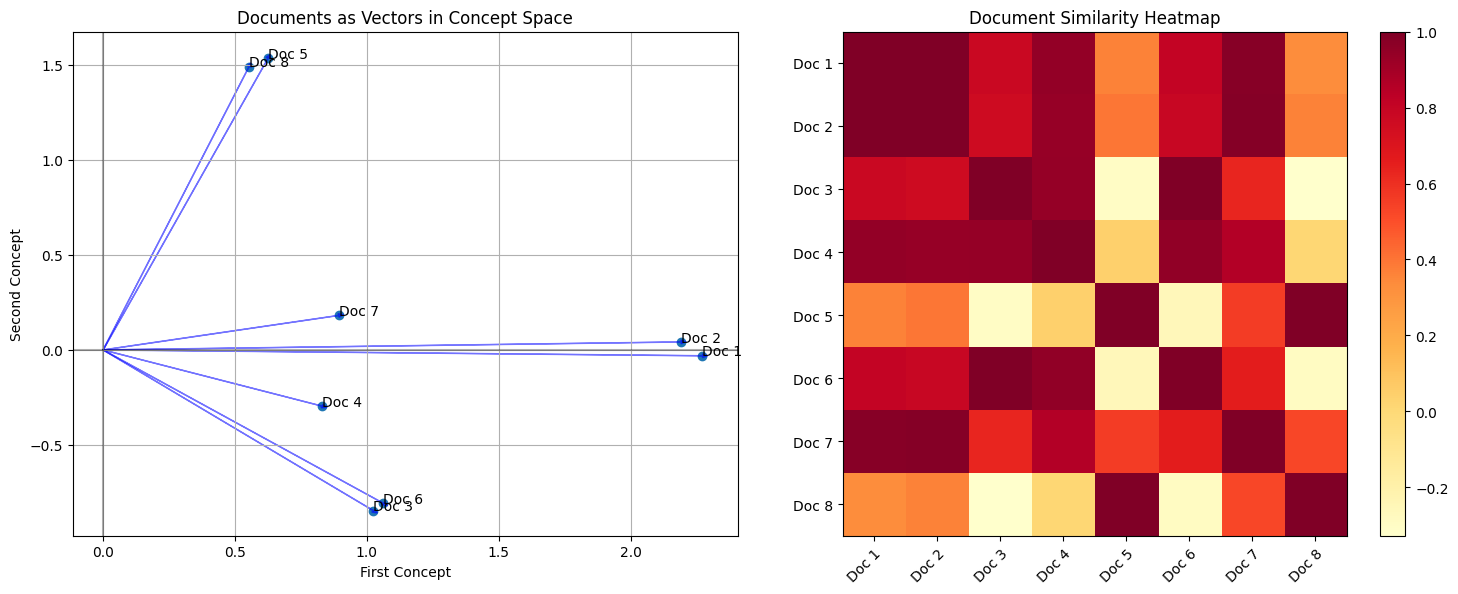


Angle Analysis for Document 1:
Angle between Doc 1 and Doc 2: 1.9° (similarity: 0.999)
Angle between Doc 1 and Doc 3: 38.7° (similarity: 0.780)
Angle between Doc 1 and Doc 4: 18.8° (similarity: 0.947)
Angle between Doc 1 and Doc 5: 68.6° (similarity: 0.365)
Angle between Doc 1 and Doc 6: 36.4° (similarity: 0.805)
Angle between Doc 1 and Doc 7: 12.3° (similarity: 0.977)
Angle between Doc 1 and Doc 8: 70.4° (similarity: 0.335)


In [7]:
#You may use this function to provide more detail on the document similarities

def visualize_document_concepts_2 (X_lsa, doc_labels=None):
    """
    Create enhanced scatter plot of documents in concept space.

    Args:
        X_lsa: Document-concept matrix
        doc_labels: Optional list of document labels
    """
    if doc_labels is None:
        doc_labels = [f'Doc {i+1}' for i in range(X_lsa.shape[0])]

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # First plot: Scatter plot with vectors
    ax1.scatter(X_lsa[:, 0], X_lsa[:, 1])

    # Draw vectors from origin to each point
    for i in range(X_lsa.shape[0]):
        ax1.arrow(0, 0, X_lsa[i, 0], X_lsa[i, 1],
                head_width=0.02, head_length=0.02,
                fc='blue', ec='blue', alpha=0.5)
        ax1.annotate(doc_labels[i], (X_lsa[i, 0], X_lsa[i, 1]))

    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax1.set_xlabel('First Concept')
    ax1.set_ylabel('Second Concept')
    ax1.set_title('Documents as Vectors in Concept Space')
    ax1.grid(True)

    # Second plot: Similarity heatmap
    similarities = cosine_similarity(X_lsa)
    im = ax2.imshow(similarities, cmap='YlOrRd')

    # Add labels
    ax2.set_xticks(np.arange(len(doc_labels)))
    ax2.set_yticks(np.arange(len(doc_labels)))
    ax2.set_xticklabels(doc_labels)
    ax2.set_yticklabels(doc_labels)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Add colorbar
    plt.colorbar(im, ax=ax2)
    ax2.set_title('Document Similarity Heatmap')

    plt.tight_layout()
    plt.show()

    # Print angle analysis for the first document
    print("\nAngle Analysis for Document 1:")
    for i in range(1, X_lsa.shape[0]):
        v1 = X_lsa[0]
        v2 = X_lsa[i]
        # Calculate angle between vectors in degrees
        cos_sim = cosine_similarity([v1], [v2])[0][0]
        angle = np.arccos(np.clip(cos_sim, -1.0, 1.0)) * 180 / np.pi
        print(f"Angle between Doc 1 and Doc {i+1}: {angle:.1f}° (similarity: {cos_sim:.3f})")



visualize_document_concepts_2(X_lsa)

1. In the visualization, we observed that documents can appear far apart in the concept space plot but still have high cosine similarity. Explain this phenomenon and discuss why cosine similarity was chosen as the similarity measure for LSA rather than Euclidean distance. Support your answer with specific examples from the results.

   My Ans: The length matters a lot in the scatter points, even when the angle is small, a long distance can still result in far-apart points. But consine similarity only cares about the angle. An example is doc 1 and doc 4, the angle is only 18.8 degrees, with a similarity of 0.977, but they seem to be far from each other. 

   

2. Compare the importance of words in Concept 1 versus Concept 2. What semantic patterns do you observe? For example, do certain types of words (e.g., actions, subjects, locations) tend to dominate different concepts? What does this tell us about how LSA captures meaning?

​	My Ans: In concept 1, the important words are "lazy", "brown", "quick", "dog", and the semantic pattern is like:  subject, desciptors, action, modifier. In concept 2, the important words are "quick", "rabbit", "forest", "sleepy", "lazy", and the semantic pattern is also like: subject, descriptors, action, modifier. I think the desciptors dominate both concepts. We can know that LSA captures meaning by co-occurrence of words. 



3. Several documents containing the word "lazy" appear in the collection. However, LSA allows us to find semantic relationships beyond simple word matching. Analyze how LSA groups these documents compared to traditional keyword matching. Does the presence of "lazy" guarantee high similarity between documents? Why or why not?

​	My Ans: No, it is possible thjat the same word "lazy" has different positive or negative in the context. For example, we can say that the "dog" is "lazy", then it is possibly positive; however, in another context when we say the "worker" is lazy, it is possibly negative. 



4. Changing the number of concepts (n_components) in LSA can significantly impact results. If we increased n_components from 2 to 3, what trade-offs would we face? Consider both computational aspects and the interpretability of results. How would you determine the optimal number of concepts for a given document collection?

​	My Ans: If we increase our n_components, we would have better (higher accuracy) interpretation of the result. However, the computional load would be heavier. To select the optimal number of n_components, we can compare the increase in accuracy and loss in efficiency. We can also use some criterias such as the increase in information entropy or HIC, etc. to find the "best" n_components.



5. The implementation removes common stop words before performing LSA. Analyze how the choice of stop words affects the final results. Find a specific example in the results where including or excluding a particular stop word might change the semantic relationships captured by LSA. Would keeping all stop words necessarily make the results worse? Explain your reasoning.

My Ans: In this example, some prepositions are chosen as the stop words. However, sometimes prepositions matter. For example, if we are introducing our house to others, like "there is a storage box on the table", "there is a storage box under the table", "there is a storage box next to the table". In this scenario, the prepositions matter, and it may matter if we keep using the prepositions as the stop words.